![DSL_logo](dsl_logo.png)


# Introduction to Text Analysis with Python

Welcome to the Digital Scholarship Lab introduction to Text Analysis with Python class. In this class we'll learn the basics of text analysis:

- parsing text
- analyzing the text

We'll use our own home made analysis tool first, then we'll use a python library called `gensim` to use some built in analysis tools.

This workshop assumes you've completed our self-paced Python prep [workshop](https://brockdsl.github.io/Intro_to_Python_Workshop/)

We'll use the Zoom's chat feature to interact.

Be sure to enable line numbers by looking for the 'gear' icon and checking the box in the 'Editor' panel.

## EG. Scrabble!

<img src="https://upload.wikimedia.org/wikipedia/commons/5/5d/Scrabble_game_in_progress.jpg" width =500x>

Scrabble is a popular game where players try to score points by spelling words and placing them on the game board. We'll use Scrabble scoring our our first attempt at text analysis. This will demonstart the basics of how Text Analysis works.

The function below gives you the Scrabble scored of any word you give it.

In [1]:
# This function will return the Scrabble score of a word

def scrabble_score(word):
    
    #Dictionary of our scrabble scores
    score_lookup = {
        "a": 1,
        "b": 3,
        "c": 3,
        "d": 2,
        "e": 1,
        "f": 4,
        "g": 2,
        "h": 4,
        "i": 1,
        "j": 8,
        "k": 5,
        "l": 1,
        "m": 3,
        "n": 1,
        "o": 1,
        "p": 3,
        "q": 10,
        "r": 1,
        "s": 1,
        "t": 1,
        "u": 1,
        "v": 4,
        "w": 4,
        "x": 8,
        "y": 4,
        "z": 10,
        "\n": 0, #just in case a new line character jumps in here
        " ":0 #normally single words don't have spaces but we'll put this here just in case
        
    }
    
    total_score = 0
    
    #We look up each letter in the scoring dictionary and add it to a running total
    #to make our dictionary shorter we are just using lowercase letters so we need to
    #change all of our input to lowercase with .lower()
    for letter in word:
        total_score = total_score + score_lookup[letter.lower()]
    
    return total_score


Text Analysis is a process comprised of three basic steps:
1. Identifying the text (or corpus) that you'd like to an analyze
1. Apply the analysis to your prepared text
1. Analyze the results

In our very basic example of scrabble we just are interested in finding the points we would get for spelling a specific word. 

In a more complext example with a larger corpus you can do any of the following types of analysis:
- determine the sentiment (positive / negative nature) of the text
- quantify how complex a piece of writing is based on the vocabulary it uses
- determine what topics are in your corpus, and match your items to these topics (this is what we are going to do)

Of course, there are many other different outcomes you can get from peforming text analysis.

Try questions Q1 - Q2 and type "All Done" in the chat box when you are done.

## Q1 Score your name

How many Points do you get for your name? Complete the expression below to find out the scrabble score of your name

In [2]:
name = "Tim"
print("Score for my name is:", scrabble_score(name))


Score for my name is: 5


## Q2

Score the name of your pet or favorite character from a story. Does your name or the name of your pet score higher in Scrabble?

In [3]:
pet_name = "Domino"
print("Score for my pet's name is:",scrabble_score(pet_name))

#Compare to see which gets more points!
if scrabble_score(pet_name) > scrabble_score(name):
    print("My pet's name scores more points!")
else:
    print("My name scores more (or the same) amount of points as my pets name")



Score for my pet's name is: 9
My pet's name scores more points!


# Beyond the basics

We just completed a very basic text analysis where we analyzed two different bits of text to see which one scores higher in Scrabble. Let's expand this idea to a more complex example using the [gensim](https://radimrehurek.com/gensim/) and [TextBlob](https://textblob.readthedocs.io/en/dev/) Python Libraries.

In [8]:
#Install textblob using magic commands
#Only needed once
%pip install textblob

from textblob import TextBlob

#import gensim
#from gensim import corpora, models, similarities, downloader

import pandas as pd
import matplotlib.pyplot as plt



Note: you may need to restart the kernel to use updated packages.


Corpus is text from [Winnie Beam diary](https://dr.library.brocku.ca/) first few months of calendar entries


In [9]:
winnie_corpus = pd.read_csv('winnie_corpus.txt', header = None, delimiter="\t")
winnie_corpus.columns = ["page","date","entry"]
winnie_corpus['date'] = pd.to_datetime(winnie_corpus['date'])

In [10]:
#Apply sentiment analysis from TextBlob

polarity = []
subjectivity = []


for day in winnie_corpus.entry:
    score = TextBlob(day)
    polarity.append(score.sentiment.polarity)
    subjectivity.append(score.sentiment.subjectivity)
    
winnie_corpus['polarity'] = polarity
winnie_corpus['subjectvitity'] = subjectivity


winnie_corpus

,page,date,entry,polarity,subjectvitity
0,7,1900-01-01,New Year. First day of 1900 Charlie Merritt di...,0.205322,0.377286
1,7,1900-01-02,Went uptown in afternoon. Was up to Eckardt's ...,-0.020000,0.120000
2,8,1900-01-03,Mrs Trusty was here washing School started to-...,0.136364,0.454545
3,8,1900-01-04,Went over to Carman's to have Ella go with me ...,0.054583,0.384167
4,9,1900-01-05,"Sweep day. I read ""At the Camerons"" in the ""Ha...",0.030357,0.345714
...,...,...,...,...,...
85,49,1900-03-27,Mamma was out collecting in afternoon at Mrs C...,-0.714286,0.857143
86,50,1900-03-28,They have Mr Beatty in Welland jail Sid was he...,0.133333,0.166667
87,50,1900-03-29,I sent 4 cents for some sample pictures from B...,0.000000,0.066667
88,51,1900-03-30,Carrie is seriously ill in Santa Barbara. Mr G...,-0.500000,1.000000


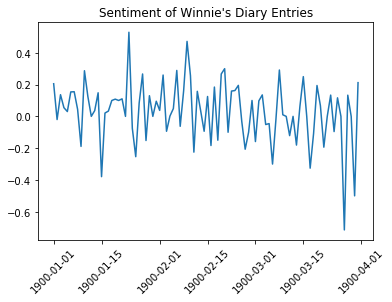

In [25]:

plt.plot(winnie_corpus["date"],winnie_corpus["polarity"])
plt.xticks(rotation='45')
plt.title("Sentiment of Winnie's Diary Entries")
plt.show()

In [7]:
#January Entries
#jan_corpus = winnie_corpus[(winnie_corpus['date'] >= '1900-01-01') & (winnie_corpus['date'] <= '1900-01-31')]

#February Entries
#feb_corpus = winnie_corpus[(winnie_corpus['date'] >= '1900-02-01') & (winnie_corpus['date'] <= '1900-02-28')]

#March Entries
#mar_corpus = winnie_corpus[(winnie_corpus['date'] >= '1900-03-01') & (winnie_corpus['date'] <= '1900-03-31')]